## Load Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', 100)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# df=pd.read_csv('data.csv')
train_df=pd.read_csv('../input/telecom-churn-datasets/churn-bigml-80.csv')
test_df=pd.read_csv('../input/telecom-churn-datasets/churn-bigml-20.csv')

In [3]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Explore Data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
train_df['Churn']=train_df['Churn'].astype('str')
test_df['Churn']=test_df['Churn'].astype('str')
train_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
train_df['State'].nunique()

51

In [7]:
train_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Exploratory Data Analysis

<AxesSubplot:xlabel='Churn', ylabel='Customer service calls'>

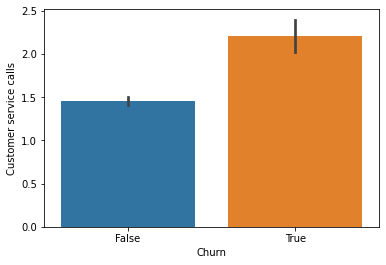

In [8]:
sns.barplot(x='Churn', y='Customer service calls',data=train_df)

In [9]:
print('Total percentage of churn = ',100*train_df[train_df['Churn']=='True'].shape[0]/train_df.shape[0])

Total percentage of churn =  14.553638409602401


In [10]:
li=[]
for name,group in train_df.groupby(['State','Churn']):
    li.append([name[1],name[0],group.shape[0]])

In [11]:
df_state_count=pd.DataFrame(li)
df_state_count.columns=['Churn','State','Count']
px.bar(df_state_count,x='State',y='Count',color='Churn')

In [12]:
train_df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [13]:
train_df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [14]:
train_df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
fig = px.box(train_df, x="Churn", y=['Account length'], points="all")
fig.show()


In [16]:
train_df['Total charge'] = train_df['Total day charge'] + train_df['Total eve charge'] + train_df['Total night charge'] + train_df['Total intl charge']
test_df['Total charge'] = test_df['Total day charge'] + test_df['Total eve charge'] + test_df['Total night charge'] + test_df['Total intl charge']
fig = px.pie(train_df, values='Total charge', names='Area code')
fig.show()

In [17]:
fig = px.box(train_df, x="Churn", y=['Total charge'], points="all",color='Voice mail plan')
fig.show()

In [18]:
fig = px.box(train_df, x="Churn", y=['Total charge'], points="all",color='International plan')
fig.show()

### Insights from the above observation
#### 1)Total percentage of churn =  14 %
#### 2)Texas has highest number of churns 
#### 3)Total charges to be paid are more for churned customers, late payment system can be facilited
#### 4)Churned customers have called more for customer service. Customer service can be improved to retain such customers

### Data Cleaning and transformation

In [19]:
train_df['Churn'] = train_df['Churn'].map({"True":1,"False":0})
train_df['International plan'].replace(['No','Yes'],[0,1],inplace=True)

test_df['Churn'] = test_df['Churn'].map({"True":1,"False":0})
test_df['International plan'].replace(['No','Yes'],[0,1],inplace=True)

encoder = LabelEncoder()
voice_train = encoder.fit_transform(train_df['Voice mail plan'])
train_df['Voice mail plan'] = voice_train

voice_test = encoder.transform(test_df['Voice mail plan'])
test_df['Voice mail plan'] = voice_test

In [20]:
test_df['Churn']

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [22]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


<AxesSubplot:>

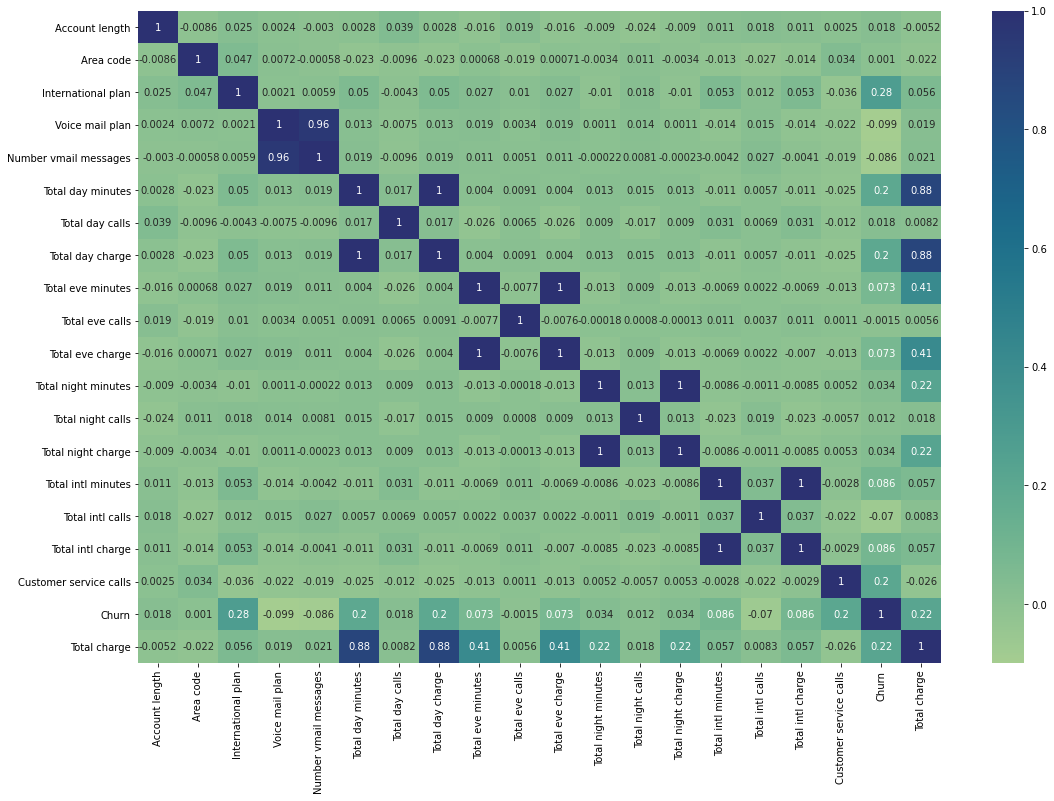

In [23]:
plt.figure(figsize=(18,12))
sns.heatmap(train_df.corr() , annot =True,cmap='crest')

#### Some features are correlated to each other and have a high coefficient.
#### Total day minutes and Total day charge  are directly related because their coeff is 1 hence let's delete all the columns with the minutes count since they are redundant.

In [24]:
train_df.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'], inplace=True,axis=1)

In [25]:
feat_cols = ['International plan','Total charge','Customer service calls']
X_train = train_df[feat_cols]
y_train = train_df['Churn']
X_test = test_df[feat_cols]
y_test = test_df['Churn']

In [26]:
y_test

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

In [27]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [28]:
X_train.shape

(2666, 3)

In [29]:
X_test.shape

(667, 3)

### Let's predict using logistic regression

In [30]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

In [31]:
y_test

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

In [32]:
score = logistic_model.score(X_test, y_test)
print("Percentage Accuracy with logistic model is ",score*100)

Percentage Accuracy with logistic model is  85.45727136431785


In [33]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       572
           1       0.47      0.16      0.24        95

    accuracy                           0.85       667
   macro avg       0.67      0.56      0.58       667
weighted avg       0.82      0.85      0.82       667



<AxesSubplot:>

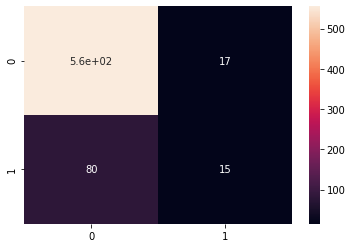

In [34]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

### Let's predict using Random Forest

In [35]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)
print("Percentage Accuracy with RandomForest model is ",score*100)

Percentage Accuracy with RandomForest model is  89.65517241379311


<AxesSubplot:>

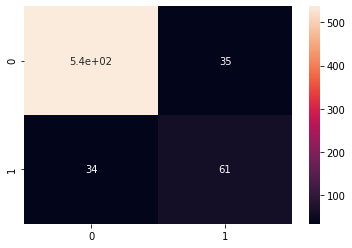

In [36]:
cf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cf_matrix, annot=True)

In [37]:
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       572
           1       0.64      0.64      0.64        95

    accuracy                           0.90       667
   macro avg       0.79      0.79      0.79       667
weighted avg       0.90      0.90      0.90       667



From the above two classification models (Logistic and Random forest) we have got good accuracy for both of them. Random forest is performing better than logistic regression